## **Model Training**

### 1.1 Import Data and Required Packages

In [3]:
# Fundamentals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
!pip install catboost
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 1.0/102.4 MB 5.0 MB/s eta 0:00:21
   - -------------------------------------- 3.4/102.4 MB 9.5 MB/s eta 0:00:11
   -- ------------------------------------- 7.1/102.4 MB 15.1 MB/s eta 0:00:07
   ----- ---------------------------------- 12.8/102.4 MB 15.5 MB/s eta 0:00:06
   ----- ---------------------------------- 14.9/102.4 MB 17.3 MB/s eta 0:00:06
   -------- ------------------------------- 22.5/102.4 MB 17.9 MB/s eta 0:00:05
   --------- ------------------------------ 25.2/102.4 MB 17.5 MB/s eta 0:00:05
   ----------- ---------------------------- 28.8/102.4 MB 17.1 MB/s eta 0:00:05
   ------------ --------------------------- 32.8/102.4 MB 17.2 MB/s eta 0:00:05
   --------------- ------------------------ 40.1/102.4 MB 19.0 MB/s eta 0:00:04
   ------------------ --------------------- 46.7/102.4 MB 20.0 

In [4]:
# Data
student_data = pd.read_csv("data/stud.csv")
print(student_data.head())

   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


### 1.2 Preparing X and Y variables, Preprocessing Data

In [18]:
X = student_data.drop(columns=['math_score'],axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
y = student_data['math_score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [19]:
# Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)


X = preprocessor.fit_transform(X)


X.shape

(1000, 19)

In [21]:
# Split Data into Train-Test Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### 1.3 Create an Evaluate Function to give all metrics after model Training

In [22]:
def evaluator(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [28]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train) # Train models

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test Dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluator(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluator(y_test, y_test_pred)

    results.append({
        'Model Name': name,
        'R2 Score of Train Set': model_train_r2,
        'R2 Score of Test Set': model_test_r2
    })

    print(name)

    print('Model performance for Training dataset:')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print('------------------------------------------')
    print('Model performance for Test dataset:')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training dataset:
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
------------------------------------------
Model performance for Test dataset:
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training dataset:
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
------------------------------------------
Model performance for Test dataset:
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training dataset:
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
------------------------------------------
Model performance for Test dataset:
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training dataset:
- Root Mean Squared Error: 5.7088
- Mean Absolu

### 1.4 Results

In [29]:
pd.DataFrame(results).sort_values(by="R2 Score of Test Set", ascending=False)

,Model Name,R2 Score of Train Set,R2 Score of Test Set
2,Ridge,0.874304,0.880593
0,Linear Regression,0.874317,0.880433
7,CatBoosting Regressor,0.958936,0.851632
8,AdaBoost Regressor,0.853084,0.851256
5,Random Forest Regressor,0.975890,0.851030
6,XGBRegressor,0.995500,0.827797
1,Lasso,0.807146,0.825320
3,K-Neighbors Regressor,0.855439,0.784030
4,Decision Tree,0.999653,0.725876


In [37]:
# Comparison between Ridge and Linear Regression models

# Ridge
rid_model = Ridge(fit_intercept=True, alpha=1)
rid_model = rid_model.fit(X_train, y_train)
y_pred_rid = rid_model.predict(X_test)
score = r2_score(y_test, y_pred_rid)*100
print(" Accuracy of Ridge model is %.2f" %score)

# Linear Regression
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)
score = r2_score(y_test, y_pred_lin)*100
print(" Accuracy of Linear model is %.2f" %score)

 Accuracy of Ridge model is 88.06
 Accuracy of Linear model is 88.04


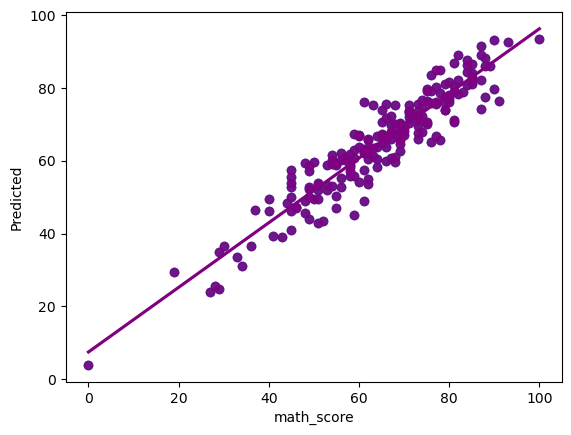

In [39]:
# Plot y_pred and y_test of Ridge Model
plt.scatter(y_test, y_pred_rid);
plt.xlabel('Actual');
plt.ylabel('Predicted')

sns.regplot(x=y_test, y=y_pred_rid, ci=None, color='Purple');